In [ ]:
!wget www.di.ens.fr/~lelarge/MNIST.tar.gz
!tar -zxvf MNIST.tar.gz
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
train_dataset = MNIST(root = './', train=True, download=True, transform=transforms.ToTensor())
test_dataset= MNIST(root = './', train=False, download=True, transform=transforms.ToTensor())

--2021-03-27 08:25:06--  http://www.di.ens.fr/~lelarge/MNIST.tar.gz
Resolving www.di.ens.fr (www.di.ens.fr)... 129.199.99.14
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.di.ens.fr/~lelarge/MNIST.tar.gz [following]
--2021-03-27 08:25:06--  https://www.di.ens.fr/~lelarge/MNIST.tar.gz
Connecting to www.di.ens.fr (www.di.ens.fr)|129.199.99.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘MNIST.tar.gz’

MNIST.tar.gz            [         <=>        ]  33.20M  18.9MB/s    in 1.8s    

2021-03-27 08:25:08 (18.9 MB/s) - ‘MNIST.tar.gz’ saved [34813078]

MNIST/
MNIST/raw/
MNIST/raw/train-labels-idx1-ubyte
MNIST/raw/t10k-labels-idx1-ubyte.gz
MNIST/raw/t10k-labels-idx1-ubyte
MNIST/raw/t10k-images-idx3-ubyte.gz
MNIST/raw/train-images-idx3-ubyte
MNIST/raw/train-labels-idx1-ubyte.gz
MNIST/raw/t10k-images-idx3-ubyte
MNIST/raw/tra

In [ ]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()

In [ ]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [ ]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Label: 5')

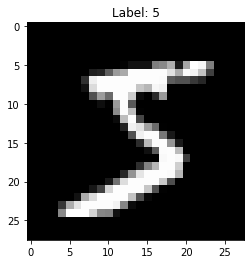

In [ ]:
plt.imshow(train_dataset.data[0].numpy(), cmap='gray') # numpy(): tensor to numpy array
plt.title('Label: %i' %train_dataset.targets[0])

In [ ]:
input_size = 28 * 28
hidden_size = 500
num_classes = 10
num_epoch = 5
batch_size = 100 # 每累積100筆loss 更新一次parameters
learnin_rate = 0.001

In [ ]:
import torch.utils.data as Data

In [ ]:
train_loader = Data.DataLoader(dataset=train_dataset, 
                               batch_size=batch_size, 
                               shuffle=True)
test_loader = Data.DataLoader(dataset=test_dataset, 
                               batch_size=batch_size, 
                               shuffle=False) # shuffle=False

In [ ]:
import torch.nn as nn

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(Model, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, num_classes)
  
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out

In [ ]:
model = Model(input_size, hidden_size, num_classes)

In [ ]:
import torch.optim as opt
from torch.autograd import Variable

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = opt.Adam(model.parameters(), lr=learnin_rate)

In [ ]:
for epoch in range(num_epoch):
  for idx, (images, labels) in enumerate(train_loader):
    images = Variable(images.view(-1, 28*28))
    labels = Variable(labels)

    optimizer.zero_grad()
    outputs = model(images)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()

    if (idx+1)%100 == 0:
      print("Epoch: %d, Batch: %d, Loss: %.4f" %(epoch+1, idx+1, loss.data))

Epoch: 1, Batch: 100, Loss: 0.3406
Epoch: 1, Batch: 200, Loss: 0.2624
Epoch: 1, Batch: 300, Loss: 0.1060
Epoch: 1, Batch: 400, Loss: 0.1223
Epoch: 1, Batch: 500, Loss: 0.2213
Epoch: 1, Batch: 600, Loss: 0.1936
Epoch: 2, Batch: 100, Loss: 0.1508
Epoch: 2, Batch: 200, Loss: 0.1790
Epoch: 2, Batch: 300, Loss: 0.0994
Epoch: 2, Batch: 400, Loss: 0.1255
Epoch: 2, Batch: 500, Loss: 0.1330
Epoch: 2, Batch: 600, Loss: 0.0928
Epoch: 3, Batch: 100, Loss: 0.0287
Epoch: 3, Batch: 200, Loss: 0.0229
Epoch: 3, Batch: 300, Loss: 0.0781
Epoch: 3, Batch: 400, Loss: 0.0525
Epoch: 3, Batch: 500, Loss: 0.0781
Epoch: 3, Batch: 600, Loss: 0.1811
Epoch: 4, Batch: 100, Loss: 0.0387
Epoch: 4, Batch: 200, Loss: 0.0306
Epoch: 4, Batch: 300, Loss: 0.0992
Epoch: 4, Batch: 400, Loss: 0.0258
Epoch: 4, Batch: 500, Loss: 0.1028
Epoch: 4, Batch: 600, Loss: 0.0675
Epoch: 5, Batch: 100, Loss: 0.1370
Epoch: 5, Batch: 200, Loss: 0.0137
Epoch: 5, Batch: 300, Loss: 0.0457
Epoch: 5, Batch: 400, Loss: 0.1464
Epoch: 5, Batch: 500

In [ ]:
import torch

In [ ]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1, 28*28))
  labels = Variable(labels) # torch.Size([100]) batch_size
  outputs = model(images) # torch.Size([100, 10]) # batch_size, num_classes
  _, pred = torch.max(outputs.data, 1) # 1=(from) row
  
  correct += (pred == labels).sum() # 猜對量sum
  total += labels.size(0)

print('Accuracy:%.3f%%' %(100.0 * float(correct)/float(total)))

Accuracy:98.000%


In [ ]:
for images, labels in test_loader:
  print(images.shape)
  print(labels.shape)
  break

torch.Size([100, 1, 28, 28])
torch.Size([100])


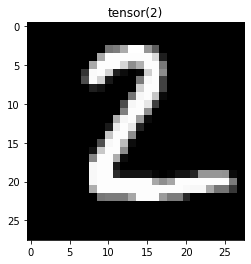

tensor([[ -4.5792,  -9.7316,  -1.6107,   1.0856, -13.9382,  -4.7645, -15.8785,
           9.2851,  -4.2097,  -2.5133],
        [ -4.5253,   2.7164,  12.6961,   0.0681, -17.7882,  -4.1420,  -6.5493,
         -18.0402,  -1.8836, -15.8143]], grad_fn=<AddmmBackward>)
tensor([7, 2])


In [ ]:
plt.imshow(images[1][0].numpy(), cmap='gray') # (28*28)
plt.title(labels[1].data)
plt.show()
images_flat = Variable(images[:2].view(-1, 28*28))
outputs = model(images_flat)
print(outputs)
_, pred_y = torch.max(outputs.data, 1)
print(pred_y)

In [ ]:
torch.save(model.state_dict(), "model.pkl")

In [ ]:
model2 = Model(input_size, hidden_size, num_classes)
model2.load_state_dict(torch.load('model.pkl'))

<All keys matched successfully>

In [ ]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1, 28*28))
  labels = Variable(labels) # torch.Size([100]) batch_size
  outputs = model2(images) # torch.Size([100, 10]) # batch_size, num_classes
  _, pred = torch.max(outputs.data, 1) # 1=(from) row
  
  correct += (pred == labels).sum() # 猜對量sum
  total += labels.size(0)

print('Accuracy:%.3f%%' %(100.0 * float(correct)/float(total)))

Accuracy:98.000%


In [ ]:
torch.save(model2, 'model2.pkl')

In [ ]:
model3 = torch.load('model2.pkl')

In [ ]:
correct = 0
total = 0
for images, labels in test_loader:
  images = Variable(images.view(-1, 28*28))
  labels = Variable(labels) # torch.Size([100]) batch_size
  outputs = model3(images) # torch.Size([100, 10]) # batch_size, num_classes
  _, pred = torch.max(outputs.data, 1) # 1=(from) row
  
  correct += (pred == labels).sum() # 猜對量sum
  total += labels.size(0)

print('Accuracy:%.3f%%' %(100.0 * float(correct)/float(total)))

Accuracy:98.000%


In [ ]:
model4 = nn.Sequential(
      nn.Linear(input_size, hidden_size),
      nn.ReLU(),
      nn.Linear(hidden_size, num_classes)
)
print(model)
print(model4)

Model(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)
Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): ReLU()
  (2): Linear(in_features=500, out_features=10, bias=True)
)


In [ ]:
# optimizer = opt.SGD(model4.parameters(), lr=learnin_rate, momentum=0.5)
# optimizer = opt.Adagrad(model4.parameters(), lr=learnin_rate)
# optimizer = opt.RMSprop(model4.parameters(), lr=learnin_rate)
optimizer = opt.Adam(model4.parameters(), lr=learnin_rate, betas=(0.9, 0.999))

In [ ]:
for epoch in range(num_epoch):
  for idx, (images, labels) in enumerate(train_loader):
    images = Variable(images.view(-1, 28*28))
    labels = Variable(labels)

    optimizer.zero_grad()
    outputs = model4(images)
    loss = loss_fn(outputs, labels)
    loss.backward()
    optimizer.step()

    if (idx+1)%100 == 0:
      print("Epoch: %d, Batch: %d, Loss: %.4f" %(epoch+1, idx+1, loss.data))

Epoch: 1, Batch: 100, Loss: 0.2694
Epoch: 1, Batch: 200, Loss: 0.1991
Epoch: 1, Batch: 300, Loss: 0.1504
Epoch: 1, Batch: 400, Loss: 0.2243
Epoch: 1, Batch: 500, Loss: 0.1614
Epoch: 1, Batch: 600, Loss: 0.1209
Epoch: 2, Batch: 100, Loss: 0.0587
Epoch: 2, Batch: 200, Loss: 0.0860
Epoch: 2, Batch: 300, Loss: 0.1362
Epoch: 2, Batch: 400, Loss: 0.0230
Epoch: 2, Batch: 500, Loss: 0.0758
Epoch: 2, Batch: 600, Loss: 0.0671
Epoch: 3, Batch: 100, Loss: 0.0854
Epoch: 3, Batch: 200, Loss: 0.0300
Epoch: 3, Batch: 300, Loss: 0.1250
Epoch: 3, Batch: 400, Loss: 0.1147
Epoch: 3, Batch: 500, Loss: 0.0387
Epoch: 3, Batch: 600, Loss: 0.0237
Epoch: 4, Batch: 100, Loss: 0.0786
Epoch: 4, Batch: 200, Loss: 0.0584
Epoch: 4, Batch: 300, Loss: 0.0549
Epoch: 4, Batch: 400, Loss: 0.1246
Epoch: 4, Batch: 500, Loss: 0.0396
Epoch: 4, Batch: 600, Loss: 0.0545
Epoch: 5, Batch: 100, Loss: 0.0548
Epoch: 5, Batch: 200, Loss: 0.1226
Epoch: 5, Batch: 300, Loss: 0.0177
Epoch: 5, Batch: 400, Loss: 0.0598
Epoch: 5, Batch: 500